
## USwB - Data Analysis & Prediction with Apache Spark, Databricks, MLLib
#### Author: Martyna Pitera

The project was carried out using Apache Spark on Databricks, utilizing Python and SQL.

The goal of this project is to analyze the Body Fat Dataset and generate predictive insights.
(dataset - https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)

This dataset contains of:
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

#### Loading the data into dataframe

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.appName("BodyFat").getOrCreate()

bodyfatSchema = StructType([
    StructField("Density", DoubleType(), True),
    StructField("BodyFat", DoubleType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Weight", DoubleType(), True),
    StructField("Height", DoubleType(), True),
    StructField("Neck", DoubleType(), True),
    StructField("Chest", DoubleType(), True),
    StructField("Abdomen", DoubleType(), True),
    StructField("Hip", DoubleType(), True),
    StructField("Thigh", DoubleType(), True),
    StructField("Knee", DoubleType(), True),
    StructField("Ankle", DoubleType(), True),
    StructField("Biceps", DoubleType(), True),
    StructField("Forearm", DoubleType(), True),
    StructField("Wrist", DoubleType(), True),
])

df = spark.read.schema(bodyfatSchema).option("header", "true").csv("/FileStore/tables/bodyfat-3.csv")

df.show()

+-------+-------+---+------+------+----+-----+-------+-----+-----+----+-----+------+-------+-----+
|Density|BodyFat|Age|Weight|Height|Neck|Chest|Abdomen|  Hip|Thigh|Knee|Ankle|Biceps|Forearm|Wrist|
+-------+-------+---+------+------+----+-----+-------+-----+-----+----+-----+------+-------+-----+
| 1.0708|   12.3| 23|154.25| 67.75|36.2| 93.1|   85.2| 94.5| 59.0|37.3| 21.9|  32.0|   27.4| 17.1|
| 1.0853|    6.1| 22|173.25| 72.25|38.5| 93.6|   83.0| 98.7| 58.7|37.3| 23.4|  30.5|   28.9| 18.2|
| 1.0414|   25.3| 22| 154.0| 66.25|34.0| 95.8|   87.9| 99.2| 59.6|38.9| 24.0|  28.8|   25.2| 16.6|
| 1.0751|   10.4| 26|184.75| 72.25|37.4|101.8|   86.4|101.2| 60.1|37.3| 22.8|  32.4|   29.4| 18.2|
|  1.034|   28.7| 24|184.25| 71.25|34.4| 97.3|  100.0|101.9| 63.2|42.2| 24.0|  32.2|   27.7| 17.7|
| 1.0502|   20.9| 24|210.25| 74.75|39.0|104.5|   94.4|107.8| 66.0|42.0| 25.6|  35.7|   30.6| 18.8|
| 1.0549|   19.2| 26| 181.0| 69.75|36.4|105.1|   90.7|100.3| 58.4|38.3| 22.9|  31.9|   27.8| 17.7|
| 1.0704| 

In [0]:
# Number of rows in dataframe
df.count()

Out[2]: 252

#### Converting inches to meters ang lbs to kgs

In [0]:
from pyspark.sql import functions as F

# Convert height from inches to meters
df = df.withColumn("Height", F.col("Height") * 0.0254)  # 1 inch = 0.0254 meters

# Convert weight from lbs to kg
df = df.withColumn("Weight", F.col("Weight") * 0.453592)  # 1 lb = 0.453592 kg


### Statistics of data

In [0]:
display(df.describe())

summary,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
mean,1.055573809523809,19.15079365079365,44.88492063492063,81.15867860476192,1.7817797619047617,37.99206349206346,100.82420634920639,92.55595238095235,99.90476190476186,59.405952380952364,38.59047619047622,23.10238095238097,32.273412698412706,28.663888888888888,18.229761904761904
stddev,0.01903143417152082,8.368740413029712,12.602039722717862,13.330687810724323,0.09303653700708002,2.4309132340195085,8.43047553192002,10.783076801381702,7.164057666842286,5.249952028401046,2.4118045870187563,1.6948933981786372,3.021273751250864,2.020691165026929,0.9335849289587025
min,0.995,0.0,22,53.750652,0.7493,31.1,79.3,69.4,85.0,47.2,33.0,19.1,24.8,21.0,15.8
max,1.1089,47.5,81,164.72193479999999,1.97485,51.2,136.2,148.1,147.7,87.3,49.1,33.9,45.0,34.9,21.4


In [0]:
df.printSchema()

root
 |-- Density: double (nullable = true)
 |-- BodyFat: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Neck: double (nullable = true)
 |-- Chest: double (nullable = true)
 |-- Abdomen: double (nullable = true)
 |-- Hip: double (nullable = true)
 |-- Thigh: double (nullable = true)
 |-- Knee: double (nullable = true)
 |-- Ankle: double (nullable = true)
 |-- Biceps: double (nullable = true)
 |-- Forearm: double (nullable = true)
 |-- Wrist: double (nullable = true)



## Exploratory Data Analysis

In [0]:
# Creating temporary view
df.createOrReplaceTempView('BodyFat')

#### Histogram of Body Fat

In [0]:
%sql

SELECT BodyFat FROM BodyFat;

BodyFat
12.3
6.1
25.3
10.4
28.7
20.9
19.2
12.4
4.1
11.7


Databricks visualization. Run in Databricks to view.

According to the American Journal of Clinical Nutrition, there are healthy body fat percentages based on your age. For people aged 20 to 39, women should aim for 21% to 32% of body fat. Men should have 8% to 19%. For people 40 to 59, women should fall between 23% to 33% and men should fall around 11% to 21%. If you’re aged 60 to 79, women should have 24% to 35% body fat and men should have 13% to 24%. 

Women naturally have a higher body fat percentage than men. Their body fat will also naturally increase as they age. 

(source- https://www.webmd.com/fitness-exercise/what-is-body-composition)

#### Histogram of Age

In [0]:
%sql

SELECT Age FROM BodyFat;

Age
23
22
22
26
24
24
26
25
25
23


Databricks visualization. Run in Databricks to view.

#### Histogram of Weight

In [0]:
%sql

SELECT Weight FROM BodyFat;

Weight
69.966566
78.584814
69.853168
83.80112199999999
83.574326
95.367718
82.100152
79.83219199999999
86.636072
89.924614


Databricks visualization. Run in Databricks to view.

#### Histogram of Height

In [0]:
%sql

SELECT Height FROM BodyFat;

Height
1.72085
1.8351499999999998
1.68275
1.8351499999999998
1.80975
1.89865
1.77165
1.8415
1.8796
1.8669


Databricks visualization. Run in Databricks to view.

#### Histogram of Neck Circumference

In [0]:
%sql

SELECT Neck FROM BodyFat;

Neck
36.2
38.5
34.0
37.4
34.4
39.0
36.4
37.8
38.1
42.1


Databricks visualization. Run in Databricks to view.

#### Histogram of Chest Circumference

In [0]:
%sql

SELECT Chest FROM BodyFat;

Chest
93.1
93.6
95.8
101.8
97.3
104.5
105.1
99.6
100.9
99.6


Databricks visualization. Run in Databricks to view.

#### Histogram of Abdomen Circumference

In [0]:
%sql

SELECT Abdomen FROM BodyFat;

Abdomen
85.2
83.0
87.9
86.4
100.0
94.4
90.7
88.5
82.5
88.6


Databricks visualization. Run in Databricks to view.

#### Histogram of Hip Circumference

In [0]:
%sql

SELECT Hip FROM BodyFat;

Hip
94.5
98.7
99.2
101.2
101.9
107.8
100.3
97.1
99.9
104.1


Databricks visualization. Run in Databricks to view.

#### Histogram of Thigh Circumference

In [0]:
%sql

SELECT Thigh FROM BodyFat;

Thigh
59.0
58.7
59.6
60.1
63.2
66.0
58.4
60.0
62.9
63.1


Databricks visualization. Run in Databricks to view.

#### Histogram of Knee Circumference

In [0]:
%sql

SELECT Knee FROM BodyFat;

Knee
37.3
37.3
38.9
37.3
42.2
42.0
38.3
39.4
38.3
41.7


Databricks visualization. Run in Databricks to view.

#### Histogram of Ankle Circumference

In [0]:
%sql

SELECT Ankle FROM BodyFat;

Ankle
21.9
23.4
24.0
22.8
24.0
25.6
22.9
23.2
23.8
25.0


Databricks visualization. Run in Databricks to view.

#### Histogram of Biceps Circumference

In [0]:
%sql

SELECT Biceps FROM BodyFat;

Biceps
32.0
30.5
28.8
32.4
32.2
35.7
31.9
30.5
35.9
35.6


Databricks visualization. Run in Databricks to view.

#### Histogram of Forearm Circumference

In [0]:
%sql

SELECT Forearm FROM BodyFat;

Forearm
27.4
28.9
25.2
29.4
27.7
30.6
27.8
29.0
31.1
30.0


Databricks visualization. Run in Databricks to view.

#### Histogram of Wrist Circumference

In [0]:
%sql

SELECT Wrist FROM BodyFat;

Wrist
17.1
18.2
16.6
18.2
17.7
18.8
17.7
18.8
18.2
19.2


Databricks visualization. Run in Databricks to view.

## Correlation Analysis

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

corrdf = spark.createDataFrame(corrmatrix,df.columns)
corrdf.head()

Out[28]: Row(Density=1.0, BodyFat=-0.9877824021639864, Age=-0.27763721075009434, Weight=-0.5940618756988721, Height=0.09788114294593664, Neck=-0.4729663617987716, Chest=-0.6825986513963713, Abdomen=-0.7989546315453323, Hip=-0.6093314301876932, Thigh=-0.5530909789787456, Knee=-0.49504035298897714, Ankle=-0.2648900333564061, Biceps=-0.4871087232659662, Forearm=-0.3516484181331154, Wrist=-0.3257159810204718)

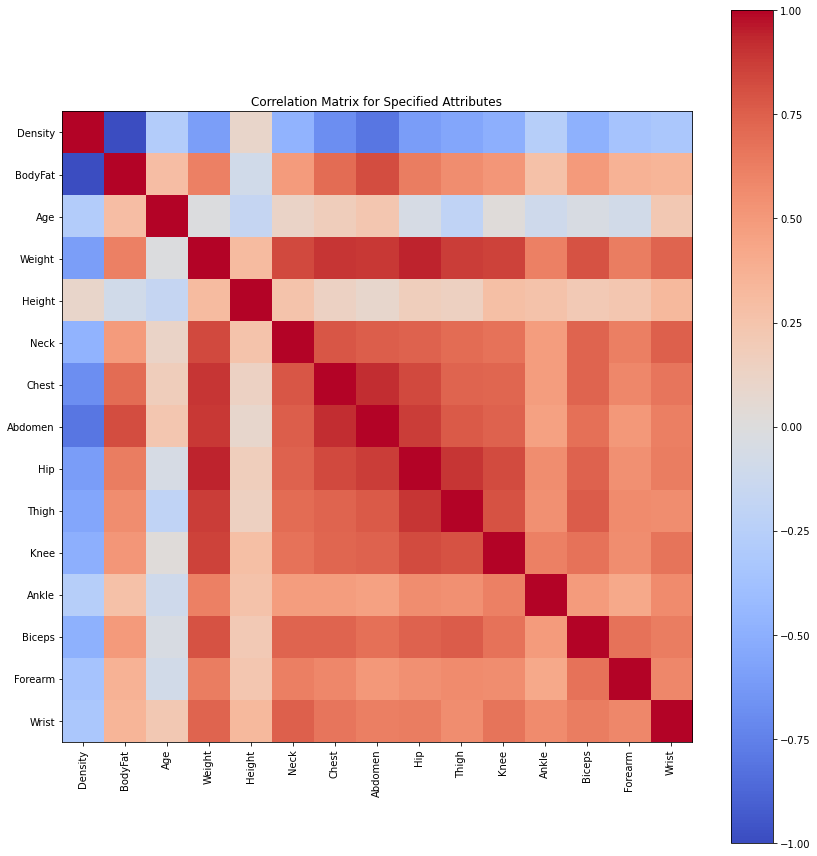

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_title("Correlation Matrix for Specified Attributes")

# plot the correlation matrix
cax = ax.imshow(corrmatrix, vmax=1, vmin=-1, cmap='coolwarm')

# set labels
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90, ha='center')
ax.set_yticklabels(df.columns)

# add colorbar
fig.colorbar(cax)

plt.tight_layout()
plt.show()



In [0]:
import six

for i in df.columns:
    if not( isinstance( df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to BodyFat for ", i, df.stat.corr('BodyFat',i))

Correlation to BodyFat for  Density -0.9877824021639853
Correlation to BodyFat for  BodyFat 1.0
Correlation to BodyFat for  Age 0.29145844013522204
Correlation to BodyFat for  Weight 0.6124140022026475
Correlation to BodyFat for  Height -0.08949537985440173
Correlation to BodyFat for  Neck 0.4905918534410396
Correlation to BodyFat for  Chest 0.7026203388938641
Correlation to BodyFat for  Abdomen 0.813432284781049
Correlation to BodyFat for  Hip 0.6252009175086624
Correlation to BodyFat for  Thigh 0.5596075319940894
Correlation to BodyFat for  Knee 0.5086652428854677
Correlation to BodyFat for  Ankle 0.265969770306373
Correlation to BodyFat for  Biceps 0.49327112589161554
Correlation to BodyFat for  Forearm 0.3613869031997192
Correlation to BodyFat for  Wrist 0.34657486452658576


#### Conclusion
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the body fat tends to go up when the abdomen circumference goes up. 

When the coefficient is close to –1, it means that there is a strong negative correlation; the body fat tends to go down when the density goes up. 

Finally, coefficients close to zero mean that there is no linear correlation.


## Exploring Dependencies of Life Expectancy

Scatter Plot (BodyFat VS Density)

In [0]:
%sql

SELECT BodyFat, Density FROM BodyFat;

BodyFat,Density
12.3,1.0708
6.1,1.0853
25.3,1.0414
10.4,1.0751
28.7,1.034
20.9,1.0502
19.2,1.0549
12.4,1.0704
4.1,1.09
11.7,1.0722


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT BodyFat, Age FROM BodyFat;

BodyFat,Age
12.3,23
6.1,22
25.3,22
10.4,26
28.7,24
20.9,24
19.2,26
12.4,25
4.1,25
11.7,23


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Weight, BodyFat FROM BodyFat;

Weight,BodyFat
69.966566,12.3
78.584814,6.1
69.853168,25.3
83.80112199999999,10.4
83.574326,28.7
95.367718,20.9
82.100152,19.2
79.83219199999999,12.4
86.636072,4.1
89.924614,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT BodyFat, Height FROM BodyFat;

BodyFat,Height
12.3,1.72085
6.1,1.8351499999999998
25.3,1.68275
10.4,1.8351499999999998
28.7,1.80975
20.9,1.89865
19.2,1.77165
12.4,1.8415
4.1,1.8796
11.7,1.8669


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Neck, BodyFat FROM BodyFat;

Chest,BodyFat
93.1,12.3
93.6,6.1
95.8,25.3
101.8,10.4
97.3,28.7
104.5,20.9
105.1,19.2
99.6,12.4
100.9,4.1
99.6,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Abdomen, BodyFat FROM BodyFat;

Abdomen,BodyFat
85.2,12.3
83.0,6.1
87.9,25.3
86.4,10.4
100.0,28.7
94.4,20.9
90.7,19.2
88.5,12.4
82.5,4.1
88.6,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Hip, BodyFat FROM BodyFat;

Hip,BodyFat
94.5,12.3
98.7,6.1
99.2,25.3
101.2,10.4
101.9,28.7
107.8,20.9
100.3,19.2
97.1,12.4
99.9,4.1
104.1,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Thigh, BodyFat FROM BodyFat;

Thigh,BodyFat
59.0,12.3
58.7,6.1
59.6,25.3
60.1,10.4
63.2,28.7
66.0,20.9
58.4,19.2
60.0,12.4
62.9,4.1
63.1,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Knee, BodyFat FROM BodyFat;

Knee,BodyFat
37.3,12.3
37.3,6.1
38.9,25.3
37.3,10.4
42.2,28.7
42.0,20.9
38.3,19.2
39.4,12.4
38.3,4.1
41.7,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Ankle, BodyFat FROM BodyFat;

Ankle,BodyFat
21.9,12.3
23.4,6.1
24.0,25.3
22.8,10.4
24.0,28.7
25.6,20.9
22.9,19.2
23.2,12.4
23.8,4.1
25.0,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Biceps, BodyFat FROM BodyFat;

Biceps,BodyFat
32.0,12.3
30.5,6.1
28.8,25.3
32.4,10.4
32.2,28.7
35.7,20.9
31.9,19.2
30.5,12.4
35.9,4.1
35.6,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Forearm, BodyFat FROM BodyFat;

Forearm,BodyFat
27.4,12.3
28.9,6.1
25.2,25.3
29.4,10.4
27.7,28.7
30.6,20.9
27.8,19.2
29.0,12.4
31.1,4.1
30.0,11.7


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

SELECT Wrist, BodyFat FROM BodyFat;

Wrist,BodyFat
17.1,12.3
18.2,6.1
16.6,25.3
18.2,10.4
17.7,28.7
18.8,20.9
17.7,19.2
18.8,12.4
18.2,4.1
19.2,11.7


Databricks visualization. Run in Databricks to view.

## Prediction of Body Fat

### Preparation of data for Machine Learning

I will use VectorAssembler, which is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees.

In each row, the values of the input columns will be concatenated into a vector in the specified order.

In [0]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = df.columns, outputCol = 'features')
vdf = vectorAssembler.transform(df)
vdf = vdf.select(['features', 'BodyFat'])
vdf.show(3)

+--------------------+-------+
|            features|BodyFat|
+--------------------+-------+
|[1.0708,12.3,23.0...|   12.3|
|[1.0853,6.1,22.0,...|    6.1|
|[1.0414,25.3,22.0...|   25.3|
+--------------------+-------+
only showing top 3 rows



Next, I will split the data into training and testing sets for machine learning model development. The training set is used to train the model on patterns in the data, while the testing set is used to assess how well the model generalizes to new, unseen data. This helps to evaluate the model's performance and check for overfitting.

In [0]:
splits = vdf.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

### Linear Regression


In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='BodyFat', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-194.29179300477628,0.458974143362629,0.0,0.0,0.0,0.0,0.0,0.0780924418429046,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: 208.23935236512824


#### Summary of the model over the training set

In [0]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.810689
r2: 0.990579



When we say that the R-squared value is 0.99, it means that around 99% of the differences or variations we see in the "BodyFat" values can be accounted for or explained by the model we've built. In other words, the model is doing a really good job of capturing and explaining the patterns and variability in the "BodyFat" data. The closer the R-squared value is to 1, the better the model fits the data.

RMSE tells us how well our model's predictions match up with the real values. But to understand if the RMSE is good or bad, we need to compare it to some basic numbers like the average, smallest, and largest values in our data. This comparison helps us see if our model is doing a decent job at predicting, considering the range of values we have in our dataset.

In [0]:
train_df.describe().show()

+-------+-----------------+
|summary|          BodyFat|
+-------+-----------------+
|  count|              178|
|   mean|18.79662921348315|
| stddev|8.375798461820827|
|    min|              3.0|
|    max|             47.5|
+-------+-----------------+



We can compare the RMSE to the variability in the BodyFat data:

The RMSE of 0.810689 is relatively small compared to the range of BodyFat values, which go from 3.0 to 47.5.

The mean BodyFat value is 18.80, and the RMSE is smaller than this mean. This suggests that, on average, our model's predictions are quite close to the actual BodyFat values.

The standard deviation of BodyFat is 8.38, and our RMSE is smaller than this as well. This indicates that the model's predictions are generally closer to the true values than the average distance between the actual BodyFat values.

#### Summary of the model over the test set

In [0]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","BodyFat","features").show(10)

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="BodyFat",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

+------------------+-------+--------------------+
|        prediction|BodyFat|            features|
+------------------+-------+--------------------+
| 35.24403421319681|   34.3|[1.018,34.3,35.0,...|
|  37.7442456249542|   35.2|[1.0202,35.2,46.0...|
| 34.75389020147844|   34.8|[1.0209,34.8,44.0...|
|35.421301558733546|   34.5|[1.0217,34.5,45.0...|
| 31.52339414091179|   32.9|[1.025,32.9,44.0,...|
|31.553324400342575|   32.0|[1.0269,32.0,41.0...|
|31.714280798708785|   31.6|[1.0279,31.6,48.0...|
|31.188208798198872|   31.5|[1.028,31.5,54.0,...|
|28.861293236829937|   29.8|[1.0317,29.8,56.0...|
| 28.82683066826843|   29.4|[1.0325,29.4,43.0...|
+------------------+-------+--------------------+
only showing top 10 rows

R Squared (R2) on test data = 0.994369
Root Mean Squared Error (RMSE) on test data = 0.622103


A lower RMSE on the test data compared to the train data suggests that the model is generalizing well to new, unseen data.

### Decision tree regression

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'BodyFat')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_predictions.select('prediction', 'BodyFat', 'features').show(10)

dt_evaluator = RegressionEvaluator(
    labelCol="BodyFat", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-------+--------------------+
|        prediction|BodyFat|            features|
+------------------+-------+--------------------+
| 37.73333333333333|   34.3|[1.018,34.3,35.0,...|
| 37.73333333333333|   35.2|[1.0202,35.2,46.0...|
| 37.73333333333333|   34.8|[1.0209,34.8,44.0...|
| 37.73333333333333|   34.5|[1.0217,34.5,45.0...|
|             33.25|   32.9|[1.025,32.9,44.0,...|
|30.966666666666658|   32.0|[1.0269,32.0,41.0...|
|30.966666666666658|   31.6|[1.0279,31.6,48.0...|
|30.966666666666658|   31.5|[1.028,31.5,54.0,...|
|             29.68|   29.8|[1.0317,29.8,56.0...|
|             29.68|   29.4|[1.0325,29.4,43.0...|
+------------------+-------+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 0.96897


### Gradient-boosted tree regression


In [0]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol = 'features', labelCol = 'BodyFat', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'BodyFat', 'features').show(10)

gbt_evaluator = RegressionEvaluator(
    labelCol="BodyFat", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-------+--------------------+
|        prediction|BodyFat|            features|
+------------------+-------+--------------------+
|37.671498584197494|   34.3|[1.018,34.3,35.0,...|
| 36.41591704332286|   35.2|[1.0202,35.2,46.0...|
|  37.6031676789961|   34.8|[1.0209,34.8,44.0...|
| 36.41591704332286|   34.5|[1.0217,34.5,45.0...|
| 33.04101163010007|   32.9|[1.025,32.9,44.0,...|
| 31.06352318234042|   32.0|[1.0269,32.0,41.0...|
|30.671988504874715|   31.6|[1.0279,31.6,48.0...|
|30.839086395037228|   31.5|[1.028,31.5,54.0,...|
| 29.61138601494879|   29.8|[1.0317,29.8,56.0...|
|29.811665601100543|   29.4|[1.0325,29.4,43.0...|
+------------------+-------+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 0.891016


Linear regression performed the best on this data.

## Summary

The project involved:

1. Loading and preprocessing of the dataset
2. Statistical analysis of the data
3. Exploratory Data Analysis to uncover patterns and insights
4. Correlation Analysis to understand relationships between variables
5. Utilizing tree models to predict Body Fat percentage
6. The Root Mean Squared Error (RMSE) for each model on the test data was:
- Linear Regression: 0.622103
- Decision Tree Regression: 0.96897
- Gradient-Boosted Tree Regression: 0.891016
These results highlight the effectiveness of the Linear Regression model in predicting Body Fat percentage, outperforming both Linear Decision Tree Regression and Gradient-Boosted Tree Regression models.

